In [23]:
import pandas as pd
import numpy as np

import datetime as dt
import glob

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('/Users/dataworkshop/Desktop/Project_smart_city/Rennescsv.csv', sep=';')


In [3]:
pistes = pd.read_csv('/Users/dataworkshop/Desktop/Project_smart_city/amenagement_cyclable.csv', sep=';')
Pisto = pistes[["geo_point_2d","geo_shape"]]

Pisto.head(5)

geodf1 = df1[['Geo Point','Geo Shape']]


In [4]:
geodf1.head(5)

,Geo Point,Geo Shape
0,"48.1315856457731,-1.640915323888561","{""coordinates"": [[-1.640915323888561, 48.13158..."
1,"48.12855192405773,-1.664144834907739","{""coordinates"": [[-1.664144834907739, 48.12855..."
2,"48.08653903528399,-1.666548375464717","{""coordinates"": [[-1.666548375464717, 48.08653..."
3,"48.08842985850001,-1.667595339478675","{""coordinates"": [[-1.667595339478675, 48.08842..."
4,"48.12471200390565,-1.703060670134121","{""coordinates"": [[-1.703060670134121, 48.12471..."


In [5]:
Pisto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   geo_point_2d  1547 non-null   object
 1   geo_shape     1547 non-null   object
dtypes: object(2)
memory usage: 24.3+ KB


In [6]:
Pisto = Pisto.rename(columns={"geo_point_2d": "Geo Point", "geo_shape": "Geo Shape"})


In [7]:
Merg = pd.merge(df1, Pisto,how="outer", on=["Geo Point", "Geo Shape"])
Merg

Merg.sort_values('Geo Point', ascending=False)

Merge = Merg.drop_duplicates('Geo Point', keep='last')
Merge


,Geo Point,Geo Shape,gml_id,objectid,accident,unit_pv,date,heure,c_jsem,jsem,...,catu_7,c_catu_8,catu_8,ntu,nbh,nbnh,annee,somme_victimes,somme_blesses,nb_vehicules
0,"48.1315856457731,-1.640915323888561","{""coordinates"": [[-1.640915323888561, 48.13158...",v_accident_corporel_2012_2018.1503,1503.0,56.0,Sécurité publique 0035238 00499,2015-11-26T00:00:00+01:00,15:30,4.0,jeudi,...,NaN,0.0,NaN,0.0,0.0,2.0,2015.0,2.0,2.0,1.0
6,"48.12855192405773,-1.664144834907739","{""coordinates"": [[-1.664144834907739, 48.12855...",v_accident_corporel_2012_2018.1025,1025.0,414.0,Sécurité publique 0035238 00428,2014-09-09T00:00:00+02:00,08:00,2.0,mardi,...,NaN,0.0,NaN,0.0,0.0,1.0,2014.0,1.0,1.0,2.0
7,"48.08653903528399,-1.666548375464717","{""coordinates"": [[-1.666548375464717, 48.08653...",v_accident_corporel_2012_2018.1535,1535.0,89.0,Sécurité publique 0035238 00498,2015-11-26T00:00:00+01:00,09:30,4.0,jeudi,...,NaN,0.0,NaN,0.0,0.0,1.0,2015.0,1.0,1.0,2.0
9,"48.08842985850001,-1.667595339478675","{""coordinates"": [[-1.667595339478675, 48.08842...",v_accident_corporel_2012_2018.1705,1705.0,260.0,Sécurité publique 0035238 00104,2015-03-04T00:00:00+01:00,10:35,3.0,mercredi,...,NaN,0.0,NaN,0.0,0.0,1.0,2015.0,1.0,1.0,2.0
11,"48.12471200390565,-1.703060670134121","{""coordinates"": [[-1.703060670134121, 48.12471...",v_accident_corporel_2012_2018.1047,1047.0,436.0,Sécurité publique 0035238 00011,2014-01-08T00:00:00+01:00,07:35,3.0,mercredi,...,NaN,0.0,NaN,0.0,0.0,1.0,2014.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5268,"48.11847386668644,-1.7438428334534233","{""coordinates"": [[[-1.743590567400328, 48.1184...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5269,"48.11842350983309,-1.7431862751779428","{""coordinates"": [[[-1.742785077686442, 48.1183...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5270,"48.0948256612877,-1.7989186865008089","{""coordinates"": [[[-1.799069897762134, 48.0949...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5271,"48.22483176986913,-1.796978411027317","{""coordinates"": [[[-1.795700348852844, 48.2250...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3726 entries, 0 to 3725
Data columns (total 56 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Geo Point       3726 non-null   object 
 1   Geo Shape       3726 non-null   object 
 2   gml_id          3726 non-null   object 
 3   objectid        3726 non-null   int64  
 4   accident        3726 non-null   int64  
 5   unit_pv         3726 non-null   object 
 6   date            3726 non-null   object 
 7   heure           3726 non-null   object 
 8   c_jsem          3726 non-null   int64  
 9   jsem            3726 non-null   object 
 10  insee           3726 non-null   int64  
 11  nom_com         3726 non-null   object 
 12  c_inter         3726 non-null   int64  
 13  inter           3713 non-null   object 
 14  adresse         3570 non-null   object 
 15  pr              567 non-null    object 
 16  nomv            2336 non-null   object 
 17  numvro          3676 non-null   o

In [9]:

df1.isnull().sum()

Geo Point            0
Geo Shape            0
gml_id               0
objectid             0
accident             0
unit_pv              0
date                 0
heure                0
c_jsem               0
jsem                 0
insee                0
nom_com              0
c_inter              0
inter               13
adresse            156
pr                3159
nomv              1390
numvro              50
pr_2              3563
nomv_2            2363
numvro_2           218
c_cadmin             0
cadmin               0
c_cadmin_2           0
cadmin_2          1393
c_cadmin_3           0
cadmin_3          3414
c_cadmin_4           0
cadmin_4          3638
c_cadmin_5           0
cadmin_5          3704
c_cadmin_6           0
cadmin_6          3722
c_catu               0
catu                 0
c_catu_2             0
catu_2             756
c_catu_3             0
catu_3            2919
c_catu_4             0
catu_4            3420
c_catu_5             0
catu_5            3587
c_catu_6   

In [10]:
Merg.isnull().sum()

Geo Point            0
Geo Shape            0
gml_id            1547
objectid          1547
accident          1547
unit_pv           1547
date              1547
heure             1547
c_jsem            1547
jsem              1547
insee             1547
nom_com           1547
c_inter           1547
inter             1560
adresse           1703
pr                4706
nomv              2937
numvro            1597
pr_2              5110
nomv_2            3910
numvro_2          1765
c_cadmin          1547
cadmin            1547
c_cadmin_2        1547
cadmin_2          2940
c_cadmin_3        1547
cadmin_3          4961
c_cadmin_4        1547
cadmin_4          5185
c_cadmin_5        1547
cadmin_5          5251
c_cadmin_6        1547
cadmin_6          5269
c_catu            1547
catu              1547
c_catu_2          1547
catu_2            2303
c_catu_3          1547
catu_3            4466
c_catu_4          1547
catu_4            4967
c_catu_5          1547
catu_5            5134
c_catu_6   

In [11]:
Merg.sort_values('Geo Point', ascending=False)

,Geo Point,Geo Shape,gml_id,objectid,accident,unit_pv,date,heure,c_jsem,jsem,...,catu_7,c_catu_8,catu_8,ntu,nbh,nbnh,annee,somme_victimes,somme_blesses,nb_vehicules
2805,"48.296473829922775,-1.93617888364559","{""coordinates"": [[-1.93617888364559, 48.296473...",v_accident_corporel_2012_2018.3246,3246.0,3361.0,Gendarmerie Nationale 0071153 01673,2018-08-22T00:00:00+02:00,12:00,3.0,mercredi,...,NaN,0.0,NaN,0.0,1.0,0.0,2018.0,1.0,1.0,1.0
1040,"48.295219987168664,-1.944699963050357","{""coordinates"": [[-1.944699963050357, 48.29521...",v_accident_corporel_2012_2018.1832,1832.0,1091.0,Gendarmerie Nationale 0014891 01144,2015-04-02T00:00:00+02:00,11:15,4.0,jeudi,...,NaN,0.0,NaN,0.0,1.0,0.0,2015.0,1.0,1.0,1.0
2196,"48.293440012885334,-1.947639942768651","{""coordinates"": [[-1.947639942768651, 48.29344...",v_accident_corporel_2012_2018.1289,1289.0,1090.0,Gendarmerie Nationale 0000681 02602,2014-09-28T00:00:00+02:00,08:15,7.0,dimanche,...,NaN,0.0,NaN,0.0,0.0,1.0,2014.0,1.0,1.0,1.0
3296,"48.29324999836466,-1.922489997523201","{""coordinates"": [[-1.922489997523201, 48.29324...",v_accident_corporel_2012_2018.879,879.0,1419.0,Gendarmerie Nationale 0014891 02475,2013-10-12T00:00:00+02:00,14:45,6.0,samedi,...,NaN,0.0,NaN,0.0,1.0,1.0,2013.0,2.0,2.0,2.0
2049,"48.2850899970934,-1.935500002451569","{""coordinates"": [[-1.935500002451569, 48.28508...",v_accident_corporel_2012_2018.2061,2061.0,1420.0,Gendarmerie Nationale 0071153 02598,2016-12-01T00:00:00+01:00,18:00,4.0,jeudi,...,NaN,0.0,NaN,0.0,1.0,0.0,2016.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3531,"47.953899975145085,-1.680509985962658","{""coordinates"": [[-1.680509985962658, 47.95389...",v_accident_corporel_2012_2018.2060,2060.0,1414.0,Gendarmerie Nationale 0028304 00065,2016-01-25T00:00:00+01:00,08:00,1.0,lundi,...,NaN,0.0,NaN,0.0,0.0,3.0,2016.0,3.0,3.0,4.0
804,"47.94699998939423,-1.726569934216603","{""coordinates"": [[-1.726569934216603, 47.94699...",v_accident_corporel_2012_2018.28,28.0,1398.0,Gendarmerie Nationale 0000702 01172,2012-04-01T00:00:00+02:00,12:15,7.0,dimanche,...,NaN,0.0,NaN,0.0,1.0,3.0,2012.0,4.0,4.0,2.0
1587,"47.946720761943496,-1.677334515189595","{""coordinates"": [[-1.677334515189595, 47.94672...",v_accident_corporel_2012_2018.3154,3154.0,2723.0,Gendarmerie Nationale 0028304 00924,2017-11-12T00:00:00+01:00,06:45,7.0,dimanche,...,NaN,0.0,NaN,0.0,1.0,0.0,2017.0,1.0,1.0,1.0
3530,"47.945049981694666,-1.67665999798799","{""coordinates"": [[-1.67665999798799, 47.945049...",v_accident_corporel_2012_2018.2059,2059.0,1413.0,Gendarmerie Nationale 0028304 00050,2016-01-22T00:00:00+01:00,07:00,5.0,vendredi,...,NaN,0.0,NaN,0.0,0.0,1.0,2016.0,1.0,1.0,2.0


In [12]:
new_df = Merg.groupby('Geo Point').size().reset_index(name='counts')
new_df=new_df[new_df.counts >= -1]



In [13]:
X = pd.merge(Merg, new_df, on='Geo Point')
X


,Geo Point,Geo Shape,gml_id,objectid,accident,unit_pv,date,heure,c_jsem,jsem,...,c_catu_8,catu_8,ntu,nbh,nbnh,annee,somme_victimes,somme_blesses,nb_vehicules,counts
0,"48.1315856457731,-1.640915323888561","{""coordinates"": [[-1.640915323888561, 48.13158...",v_accident_corporel_2012_2018.1503,1503.0,56.0,Sécurité publique 0035238 00499,2015-11-26T00:00:00+01:00,15:30,4.0,jeudi,...,0.0,NaN,0.0,0.0,2.0,2015.0,2.0,2.0,1.0,1
1,"48.12855192405773,-1.664144834907739","{""coordinates"": [[-1.664144834907739, 48.12855...",v_accident_corporel_2012_2018.1529,1529.0,83.0,Sécurité publique 0035238 00324,2015-08-06T00:00:00+02:00,03:40,4.0,jeudi,...,0.0,NaN,0.0,0.0,1.0,2015.0,1.0,1.0,2.0,6
2,"48.12855192405773,-1.664144834907739","{""coordinates"": [[-1.664144834907739, 48.12855...",v_accident_corporel_2012_2018.1539,1539.0,93.0,Sécurité publique 0035238 00576,2015-12-29T00:00:00+01:00,21:20,2.0,mardi,...,0.0,NaN,0.0,0.0,1.0,2015.0,1.0,1.0,2.0,6
3,"48.12855192405773,-1.664144834907739","{""coordinates"": [[-1.664144834907739, 48.12855...",v_accident_corporel_2012_2018.1500,1500.0,53.0,Sécurité publique 0035238 00310,2015-07-23T00:00:00+02:00,22:15,4.0,jeudi,...,0.0,NaN,0.0,0.0,1.0,2015.0,1.0,1.0,2.0,6
4,"48.12855192405773,-1.664144834907739","{""coordinates"": [[-1.664144834907739, 48.12855...",v_accident_corporel_2012_2018.1509,1509.0,63.0,Sécurité publique 0035238 00175,2015-04-24T00:00:00+02:00,23:30,5.0,vendredi,...,0.0,NaN,0.0,1.0,1.0,2015.0,2.0,2.0,2.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5268,"48.11847386668644,-1.7438428334534233","{""coordinates"": [[[-1.743590567400328, 48.1184...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5269,"48.11842350983309,-1.7431862751779428","{""coordinates"": [[[-1.742785077686442, 48.1183...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5270,"48.0948256612877,-1.7989186865008089","{""coordinates"": [[[-1.799069897762134, 48.0949...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5271,"48.22483176986913,-1.796978411027317","{""coordinates"": [[[-1.795700348852844, 48.2250...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [14]:
X.sort_values('counts', ascending=True)

,Geo Point,Geo Shape,gml_id,objectid,accident,unit_pv,date,heure,c_jsem,jsem,...,c_catu_8,catu_8,ntu,nbh,nbnh,annee,somme_victimes,somme_blesses,nb_vehicules,counts
0,"48.1315856457731,-1.640915323888561","{""coordinates"": [[-1.640915323888561, 48.13158...",v_accident_corporel_2012_2018.1503,1503.0,56.0,Sécurité publique 0035238 00499,2015-11-26T00:00:00+01:00,15:30,4.0,jeudi,...,0.0,NaN,0.0,0.0,2.0,2015.0,2.0,2.0,1.0,1
3537,"48.146399980339325,-1.698730037999505","{""coordinates"": [[-1.698730037999505, 48.14639...",v_accident_corporel_2012_2018.2110,2110.0,1600.0,Sécurité publique 0035238 00128,2016-04-01T00:00:00+02:00,17:55,5.0,vendredi,...,0.0,NaN,0.0,1.0,1.0,2016.0,2.0,2.0,3.0,1
3536,"48.16313373747678,-1.680403132869851","{""coordinates"": [[-1.680403132869851, 48.16313...",v_accident_corporel_2012_2018.2102,2102.0,1517.0,Sécurité publique 0035238 00473,2016-09-29T00:00:00+02:00,08:08,4.0,jeudi,...,0.0,NaN,0.0,0.0,2.0,2016.0,2.0,2.0,4.0,1
3535,"48.13498946646219,-1.693543432100899","{""coordinates"": [[-1.693543432100899, 48.13498...",v_accident_corporel_2012_2018.2100,2100.0,1515.0,Sécurité publique 0035238 00458,2016-09-22T00:00:00+02:00,18:30,4.0,jeudi,...,0.0,NaN,0.0,0.0,1.0,2016.0,1.0,1.0,2.0,1
3534,"48.17499996727722,-1.717060494594156","{""coordinates"": [[-1.717060494594156, 48.17499...",v_accident_corporel_2012_2018.2086,2086.0,1501.0,Sécurité publique 0035238 00442,2016-10-26T00:00:00+02:00,19:08,3.0,mercredi,...,0.0,NaN,0.0,1.0,1.0,2016.0,2.0,2.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,"48.12855225613862,-1.664145533886381","{""coordinates"": [[-1.664145533886381, 48.12855...",v_accident_corporel_2012_2018.2354,2354.0,2154.0,Sécurité publique 0035238 00371,2016-09-05T00:00:00+02:00,19:50,1.0,lundi,...,0.0,NaN,0.0,0.0,1.0,2016.0,1.0,1.0,1.0,12
227,"48.12855225613862,-1.664145533886381","{""coordinates"": [[-1.664145533886381, 48.12855...",v_accident_corporel_2012_2018.2216,2216.0,1975.0,Sécurité publique 0035238 00477,2016-09-04T00:00:00+02:00,19:31,7.0,dimanche,...,0.0,NaN,0.0,0.0,1.0,2016.0,1.0,1.0,2.0,12
231,"48.12855225613862,-1.664145533886381","{""coordinates"": [[-1.664145533886381, 48.12855...",v_accident_corporel_2012_2018.2331,2331.0,2112.0,Sécurité publique 0035238 00496,2016-11-14T00:00:00+01:00,07:50,1.0,lundi,...,0.0,NaN,0.0,0.0,1.0,2016.0,1.0,1.0,2.0,12
223,"48.12855225613862,-1.664145533886381","{""coordinates"": [[-1.664145533886381, 48.12855...",v_accident_corporel_2012_2018.2199,2199.0,1952.0,Sécurité publique 0035238 00376,2016-07-29T00:00:00+02:00,18:06,5.0,vendredi,...,0.0,NaN,0.0,0.0,1.0,2016.0,1.0,1.0,1.0,12


In [15]:
X['counts'] = X['counts'].replace(1, 'Not Yet')

In [16]:
X

,Geo Point,Geo Shape,gml_id,objectid,accident,unit_pv,date,heure,c_jsem,jsem,...,c_catu_8,catu_8,ntu,nbh,nbnh,annee,somme_victimes,somme_blesses,nb_vehicules,counts
0,"48.1315856457731,-1.640915323888561","{""coordinates"": [[-1.640915323888561, 48.13158...",v_accident_corporel_2012_2018.1503,1503.0,56.0,Sécurité publique 0035238 00499,2015-11-26T00:00:00+01:00,15:30,4.0,jeudi,...,0.0,NaN,0.0,0.0,2.0,2015.0,2.0,2.0,1.0,Not Yet
1,"48.12855192405773,-1.664144834907739","{""coordinates"": [[-1.664144834907739, 48.12855...",v_accident_corporel_2012_2018.1529,1529.0,83.0,Sécurité publique 0035238 00324,2015-08-06T00:00:00+02:00,03:40,4.0,jeudi,...,0.0,NaN,0.0,0.0,1.0,2015.0,1.0,1.0,2.0,6
2,"48.12855192405773,-1.664144834907739","{""coordinates"": [[-1.664144834907739, 48.12855...",v_accident_corporel_2012_2018.1539,1539.0,93.0,Sécurité publique 0035238 00576,2015-12-29T00:00:00+01:00,21:20,2.0,mardi,...,0.0,NaN,0.0,0.0,1.0,2015.0,1.0,1.0,2.0,6
3,"48.12855192405773,-1.664144834907739","{""coordinates"": [[-1.664144834907739, 48.12855...",v_accident_corporel_2012_2018.1500,1500.0,53.0,Sécurité publique 0035238 00310,2015-07-23T00:00:00+02:00,22:15,4.0,jeudi,...,0.0,NaN,0.0,0.0,1.0,2015.0,1.0,1.0,2.0,6
4,"48.12855192405773,-1.664144834907739","{""coordinates"": [[-1.664144834907739, 48.12855...",v_accident_corporel_2012_2018.1509,1509.0,63.0,Sécurité publique 0035238 00175,2015-04-24T00:00:00+02:00,23:30,5.0,vendredi,...,0.0,NaN,0.0,1.0,1.0,2015.0,2.0,2.0,2.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5268,"48.11847386668644,-1.7438428334534233","{""coordinates"": [[[-1.743590567400328, 48.1184...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Yet
5269,"48.11842350983309,-1.7431862751779428","{""coordinates"": [[[-1.742785077686442, 48.1183...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Yet
5270,"48.0948256612877,-1.7989186865008089","{""coordinates"": [[[-1.799069897762134, 48.0949...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Yet
5271,"48.22483176986913,-1.796978411027317","{""coordinates"": [[[-1.795700348852844, 48.2250...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Yet


In [17]:
X['counts'] = X['counts'].apply(lambda x: 'Already' if isinstance(x, int) else x)


In [18]:

Y = Y.drop_duplicates('Geo Point', keep='last')


,Geo Point,Geo Shape,gml_id,objectid,accident,unit_pv,date,heure,c_jsem,jsem,...,c_catu_8,catu_8,ntu,nbh,nbnh,annee,somme_victimes,somme_blesses,nb_vehicules,counts
0,"48.1315856457731,-1.640915323888561","{""coordinates"": [[-1.640915323888561, 48.13158...",v_accident_corporel_2012_2018.1503,1503.0,56.0,Sécurité publique 0035238 00499,2015-11-26T00:00:00+01:00,15:30,4.0,jeudi,...,0.0,NaN,0.0,0.0,2.0,2015.0,2.0,2.0,1.0,Not Yet
1,"48.12855192405773,-1.664144834907739","{""coordinates"": [[-1.664144834907739, 48.12855...",v_accident_corporel_2012_2018.1529,1529.0,83.0,Sécurité publique 0035238 00324,2015-08-06T00:00:00+02:00,03:40,4.0,jeudi,...,0.0,NaN,0.0,0.0,1.0,2015.0,1.0,1.0,2.0,Already
2,"48.12855192405773,-1.664144834907739","{""coordinates"": [[-1.664144834907739, 48.12855...",v_accident_corporel_2012_2018.1539,1539.0,93.0,Sécurité publique 0035238 00576,2015-12-29T00:00:00+01:00,21:20,2.0,mardi,...,0.0,NaN,0.0,0.0,1.0,2015.0,1.0,1.0,2.0,Already
3,"48.12855192405773,-1.664144834907739","{""coordinates"": [[-1.664144834907739, 48.12855...",v_accident_corporel_2012_2018.1500,1500.0,53.0,Sécurité publique 0035238 00310,2015-07-23T00:00:00+02:00,22:15,4.0,jeudi,...,0.0,NaN,0.0,0.0,1.0,2015.0,1.0,1.0,2.0,Already
4,"48.12855192405773,-1.664144834907739","{""coordinates"": [[-1.664144834907739, 48.12855...",v_accident_corporel_2012_2018.1509,1509.0,63.0,Sécurité publique 0035238 00175,2015-04-24T00:00:00+02:00,23:30,5.0,vendredi,...,0.0,NaN,0.0,1.0,1.0,2015.0,2.0,2.0,2.0,Already
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5268,"48.11847386668644,-1.7438428334534233","{""coordinates"": [[[-1.743590567400328, 48.1184...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Yet
5269,"48.11842350983309,-1.7431862751779428","{""coordinates"": [[[-1.742785077686442, 48.1183...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Yet
5270,"48.0948256612877,-1.7989186865008089","{""coordinates"": [[[-1.799069897762134, 48.0949...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Yet
5271,"48.22483176986913,-1.796978411027317","{""coordinates"": [[[-1.795700348852844, 48.2250...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Yet


In [19]:
X.isnull().sum()

Geo Point            0
Geo Shape            0
gml_id            1547
objectid          1547
accident          1547
unit_pv           1547
date              1547
heure             1547
c_jsem            1547
jsem              1547
insee             1547
nom_com           1547
c_inter           1547
inter             1560
adresse           1703
pr                4706
nomv              2937
numvro            1597
pr_2              5110
nomv_2            3910
numvro_2          1765
c_cadmin          1547
cadmin            1547
c_cadmin_2        1547
cadmin_2          2940
c_cadmin_3        1547
cadmin_3          4961
c_cadmin_4        1547
cadmin_4          5185
c_cadmin_5        1547
cadmin_5          5251
c_cadmin_6        1547
cadmin_6          5269
c_catu            1547
catu              1547
c_catu_2          1547
catu_2            2303
c_catu_3          1547
catu_3            4466
c_catu_4          1547
catu_4            4967
c_catu_5          1547
catu_5            5134
c_catu_6   

In [37]:
Tahar = X[['Geo Point','c_cadmin', 'cadmin', 'c_cadmin_2', 'cadmin_2',
       'c_cadmin_3', 'cadmin_3', 'c_cadmin_4', 'cadmin_4', 'c_cadmin_5',
       'cadmin_5', 'c_cadmin_6', 'cadmin_6','heure','somme_victimes','somme_blesses','accident','counts']]

mask=((Tahar["c_cadmin"]==1) | (Tahar["c_cadmin_2"]==1) | (Tahar["c_cadmin_3"]==1)| (Tahar["c_cadmin_4"]==1)
      | (Tahar["c_cadmin_5"]==1)| (Tahar["c_cadmin_6"]==1))
velo=Tahar[mask]

velo

velo =velo.rename(columns={"counts": "etat"})

velo

,Geo Point,c_cadmin,cadmin,c_cadmin_2,cadmin_2,c_cadmin_3,cadmin_3,c_cadmin_4,cadmin_4,c_cadmin_5,cadmin_5,c_cadmin_6,cadmin_6,heure,somme_victimes,somme_blesses,accident,etat
14,"48.10540063193308,-1.708447226846814",7.0,VL,1.0,bicyclette,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,18:30,1.0,1.0,100.0,Already
15,"48.10540063193308,-1.708447226846814",7.0,VL,1.0,bicyclette,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,19:10,1.0,1.0,208.0,Already
16,"48.10540063193308,-1.708447226846814",1.0,bicyclette,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,10:30,1.0,1.0,429.0,Already
18,"48.1038672570623,-1.677095886362533",7.0,VL,1.0,bicyclette,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,07:50,1.0,1.0,114.0,Not Yet
21,"48.11184067329569,-1.646403437339559",10.0,"VU seul ( 1,5 < PTAC =< 3,5t )",1.0,bicyclette,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,13:25,1.0,1.0,422.0,Already
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,"48.11408022046719,-1.607409503760945",7.0,VL,1.0,bicyclette,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,14:05,1.0,1.0,3024.0,Not Yet
3707,"48.11275904402134,-1.637819182345578",1.0,bicyclette,10.0,"VU seul ( 1,5 < PTAC =< 3,5t )",0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,12:00,1.0,1.0,3027.0,Not Yet
3711,"48.109858376660334,-1.679173925689499",1.0,bicyclette,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,16:10,2.0,2.0,3043.0,Not Yet
3723,"48.15154981120462,-1.683416835993554",1.0,bicyclette,7.0,VL,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,08:20,1.0,1.0,3145.0,Not Yet


# <font color='red'>Analyse du nombre des blessés & Victimes </font>

In [24]:
#Somme des victimes
__velo__ = velo.copy()
x = __velo__.iloc[:,[14,15]].values
np.unique(x)

array([0., 1., 2., 3.])

In [25]:
#Somme des blessés
y = __velo__.iloc[:,[15]].values
np.unique(y)

array([0., 1., 2., 3.])

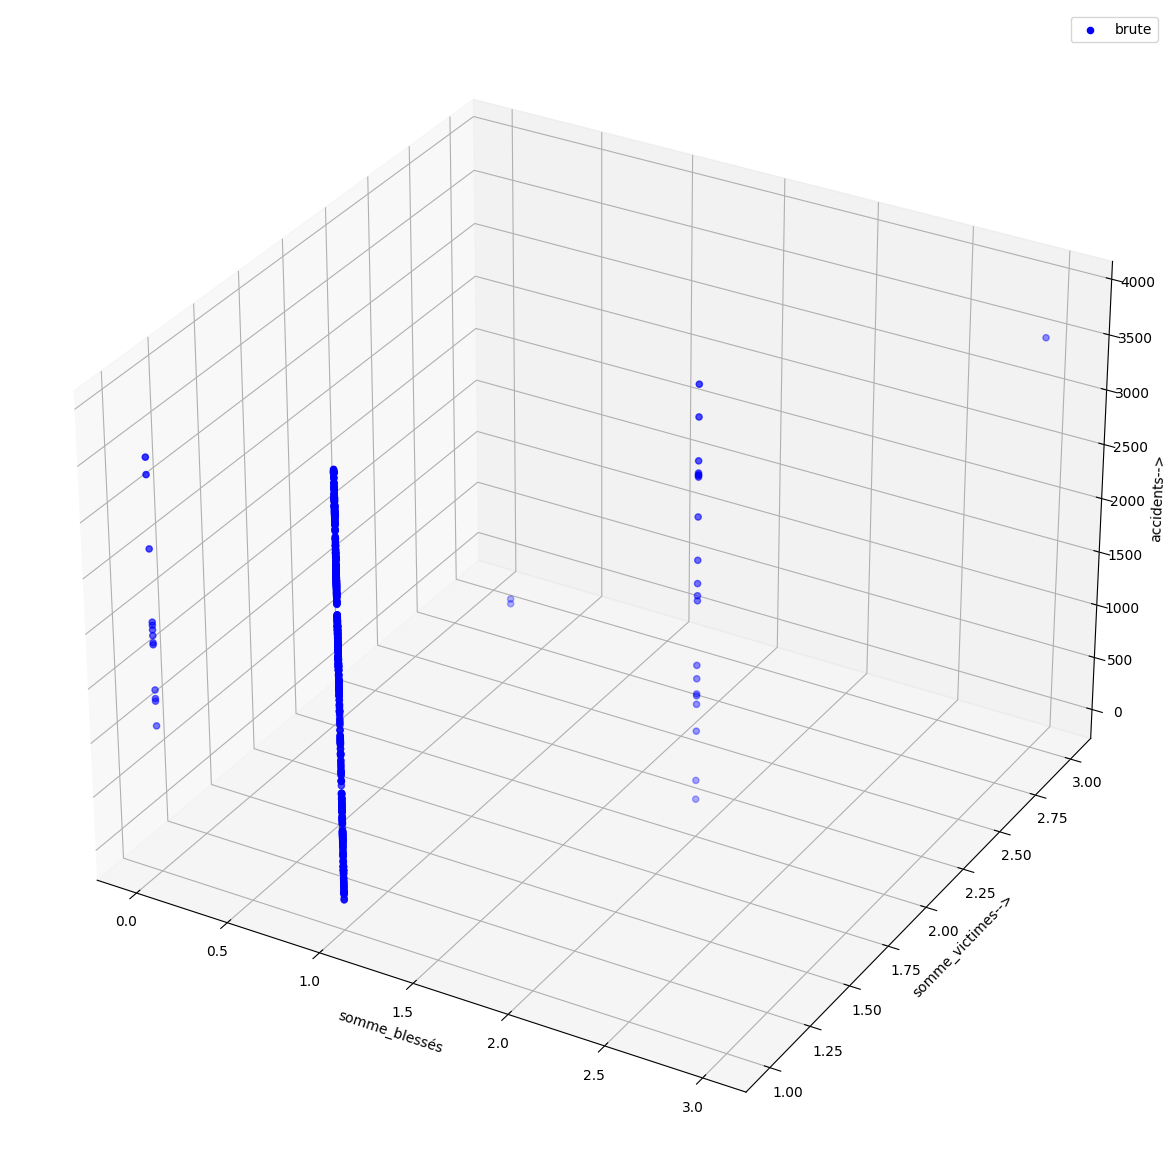

In [26]:
x = velo['somme_blesses']
y = velo['somme_victimes']
z = velo['accident']

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, color = 'blue', label = "brute")

ax.set_xlabel('somme_blessés')
ax.set_ylabel('somme_victimes-->')
ax.set_zlabel('accidents-->')
ax.legend()
plt.show()

In [27]:
velo_ = velo.copy()
#velo2 = velo_.drop("Geo Point", axis=1, inplace=True)
x = velo_.iloc[:,[16]].values
np.unique(x)

array([2.000e+00, 3.000e+00, 2.000e+01, 5.400e+01, 5.800e+01, 5.900e+01,
       6.500e+01, 6.900e+01, 7.000e+01, 7.300e+01, 7.400e+01, 7.500e+01,
       7.600e+01, 7.800e+01, 8.400e+01, 1.000e+02, 1.030e+02, 1.130e+02,
       1.140e+02, 1.260e+02, 1.310e+02, 1.360e+02, 1.430e+02, 1.500e+02,
       1.560e+02, 1.600e+02, 1.710e+02, 1.730e+02, 1.760e+02, 1.940e+02,
       1.990e+02, 2.080e+02, 2.100e+02, 2.410e+02, 2.480e+02, 2.510e+02,
       2.520e+02, 2.540e+02, 2.680e+02, 2.720e+02, 2.750e+02, 2.770e+02,
       2.780e+02, 2.820e+02, 2.830e+02, 2.850e+02, 3.040e+02, 3.080e+02,
       3.100e+02, 3.110e+02, 3.120e+02, 3.150e+02, 3.170e+02, 3.270e+02,
       3.510e+02, 3.590e+02, 3.600e+02, 3.620e+02, 3.740e+02, 4.040e+02,
       4.090e+02, 4.150e+02, 4.200e+02, 4.220e+02, 4.290e+02, 4.350e+02,
       4.440e+02, 4.470e+02, 4.670e+02, 4.740e+02, 4.920e+02, 4.980e+02,
       4.990e+02, 5.000e+02, 5.010e+02, 5.220e+02, 5.230e+02, 5.250e+02,
       5.350e+02, 5.370e+02, 5.390e+02, 5.430e+02, 

/Users/dataworkshop/Desktop/Project_smart_city/Data-science/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/dataworkshop/Desktop/Project_smart_city/Data-science/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/dataworkshop/Desktop/Project_smart_city/Data-science/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/dataworkshop/Desktop/Project_s

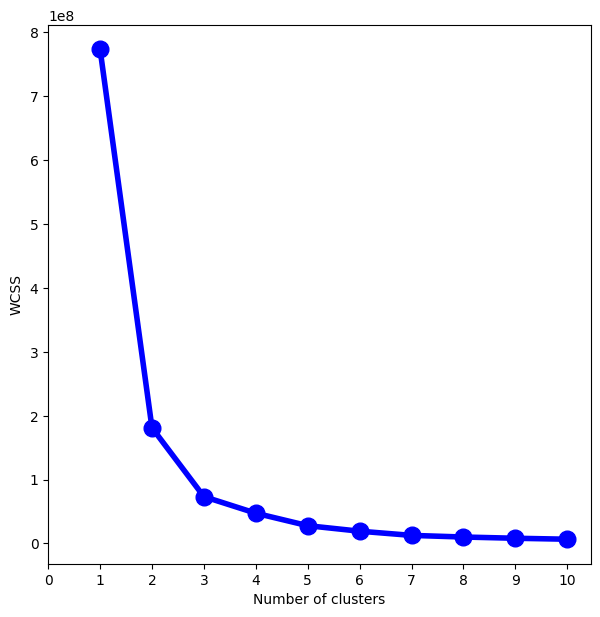

In [28]:
# find the optimal number of clusters using elbow method

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'blue')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [29]:
model = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)
np.unique(y_clusters)

array([0, 1, 2], dtype=int32)

In [30]:
velo[y_clusters ==0]
print('le shape du premier cluster est : ', x[y_clusters == 0].shape)
print('le shape du deuxième cluster est : ', x[y_clusters == 1].shape)
print('le shape du troisième cluster est : ', x[y_clusters == 2].shape)

le shape du premier cluster est :  (206, 1)
le shape du deuxième cluster est :  (202, 1)
le shape du troisième cluster est :  (208, 1)


In [31]:
print(np.unique(velo[y_clusters ==0]['somme_victimes']))
print(np.unique(velo[y_clusters ==1]['somme_victimes']))
print(np.unique(velo[y_clusters ==2]['somme_victimes']))


[1. 2.]
[1. 2.]
[1. 2. 3.]


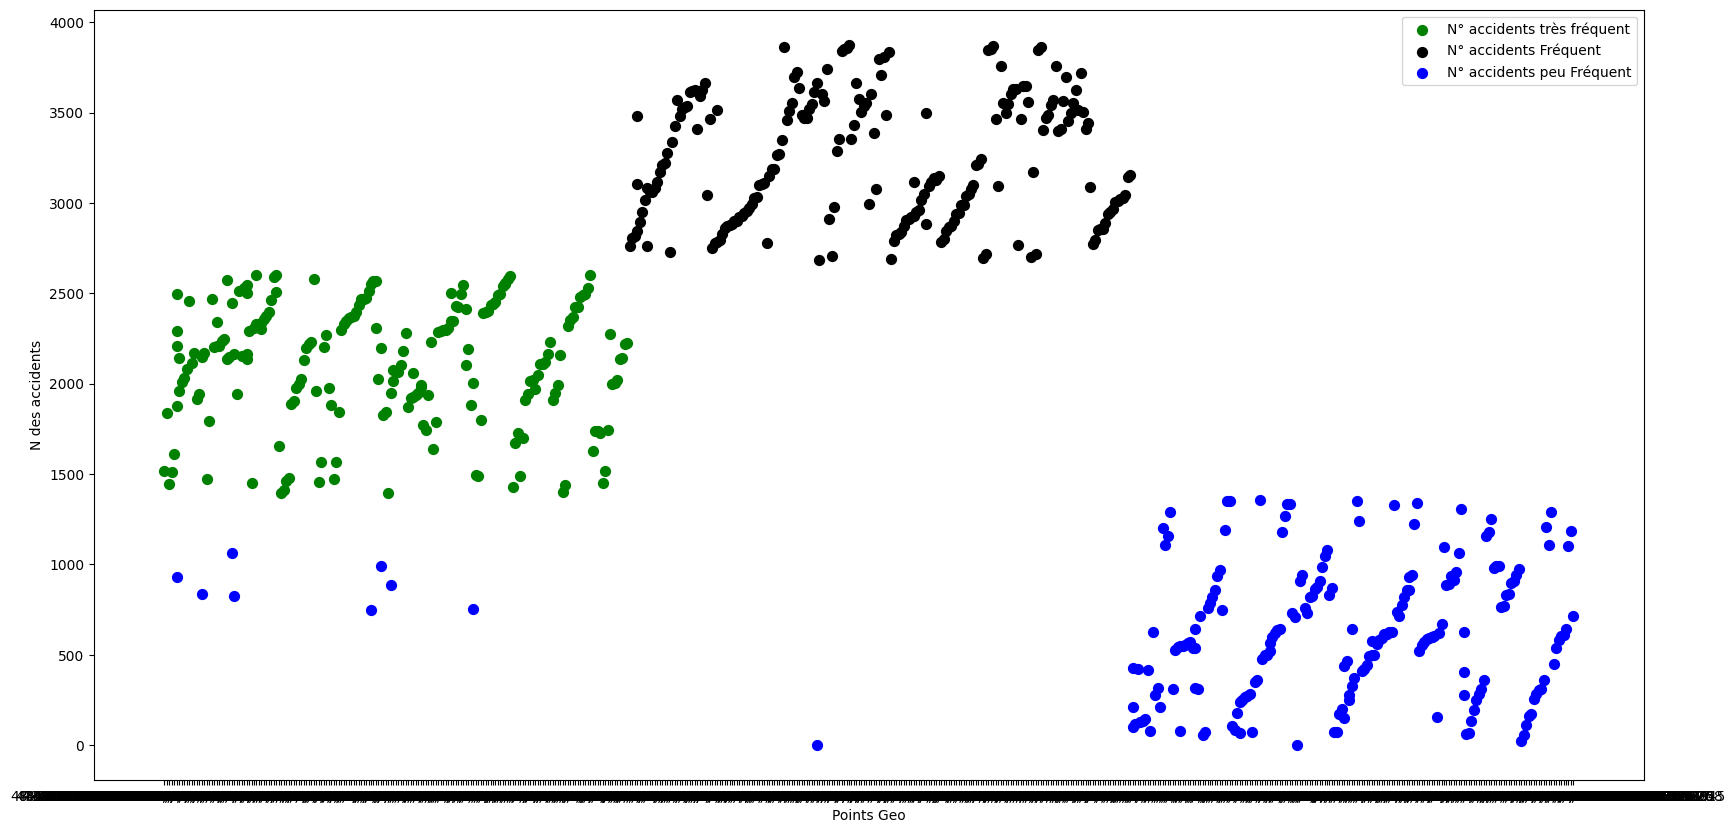

In [32]:
plt.figure(figsize = (20,10))
plt.scatter(velo[y_clusters ==0]['Geo Point'],x[y_clusters == 0],s = 50, c = 'green', label = "N° accidents très fréquent")
plt.scatter(velo[y_clusters ==2]['Geo Point'],x[y_clusters == 2],s = 50, c = 'black', label = "N° accidents Fréquent")
plt.scatter(velo[y_clusters ==1]['Geo Point'],x[y_clusters == 1],s = 50, c = 'blue', label = "N° accidents peu Fréquent")

plt.xlabel("Points Geo")
plt.ylabel("N des accidents")
plt.legend()
plt.show()

In [33]:
acc = velo[y_clusters ==0]['accident']
coord = velo[y_clusters ==0]['Geo Point']
vict = velo[y_clusters ==0]['somme_victimes']
bless = velo[y_clusters ==0]['somme_blesses']

acc1 = velo[y_clusters ==1]['accident']
coord1 = velo[y_clusters ==1]['Geo Point']
vict1 = velo[y_clusters ==1]['somme_victimes']

acc2 = velo[y_clusters ==2]['accident']
coord2 = velo[y_clusters ==2]['Geo Point']
vict2 = velo[y_clusters ==2]['somme_victimes']

acc_clust00 =[]
acc_clust01 =[]
acc_clust10 = []
acc_clust11 = []
acc_clust20 = []
acc_clust21 = []

coord_clust00 =[]
coord_clust01 =[]
coord_clust10 =[]
coord_clust11 =[]
coord_clust20 =[]
coord_clust21 =[]
for i,j,k,p in zip(vict,acc, coord, bless):
    if (i>1):
        acc_clust01.append(j)
        coord_clust01.append(k)
    else:
        acc_clust00.append(j)
        coord_clust00.append(k)

for i,j,k in zip(vict1,acc1, coord1):
    if (i>1):
        acc_clust11.append(j)
        coord_clust11.append(k)
    else:
        acc_clust10.append(j)
        coord_clust10.append(k)


for i,j,k in zip(vict2,acc2, coord2):
    if (i>1):
        acc_clust21.append(j)
        coord_clust21.append(k)
    else:
        acc_clust20.append(j)
        coord_clust20.append(k)


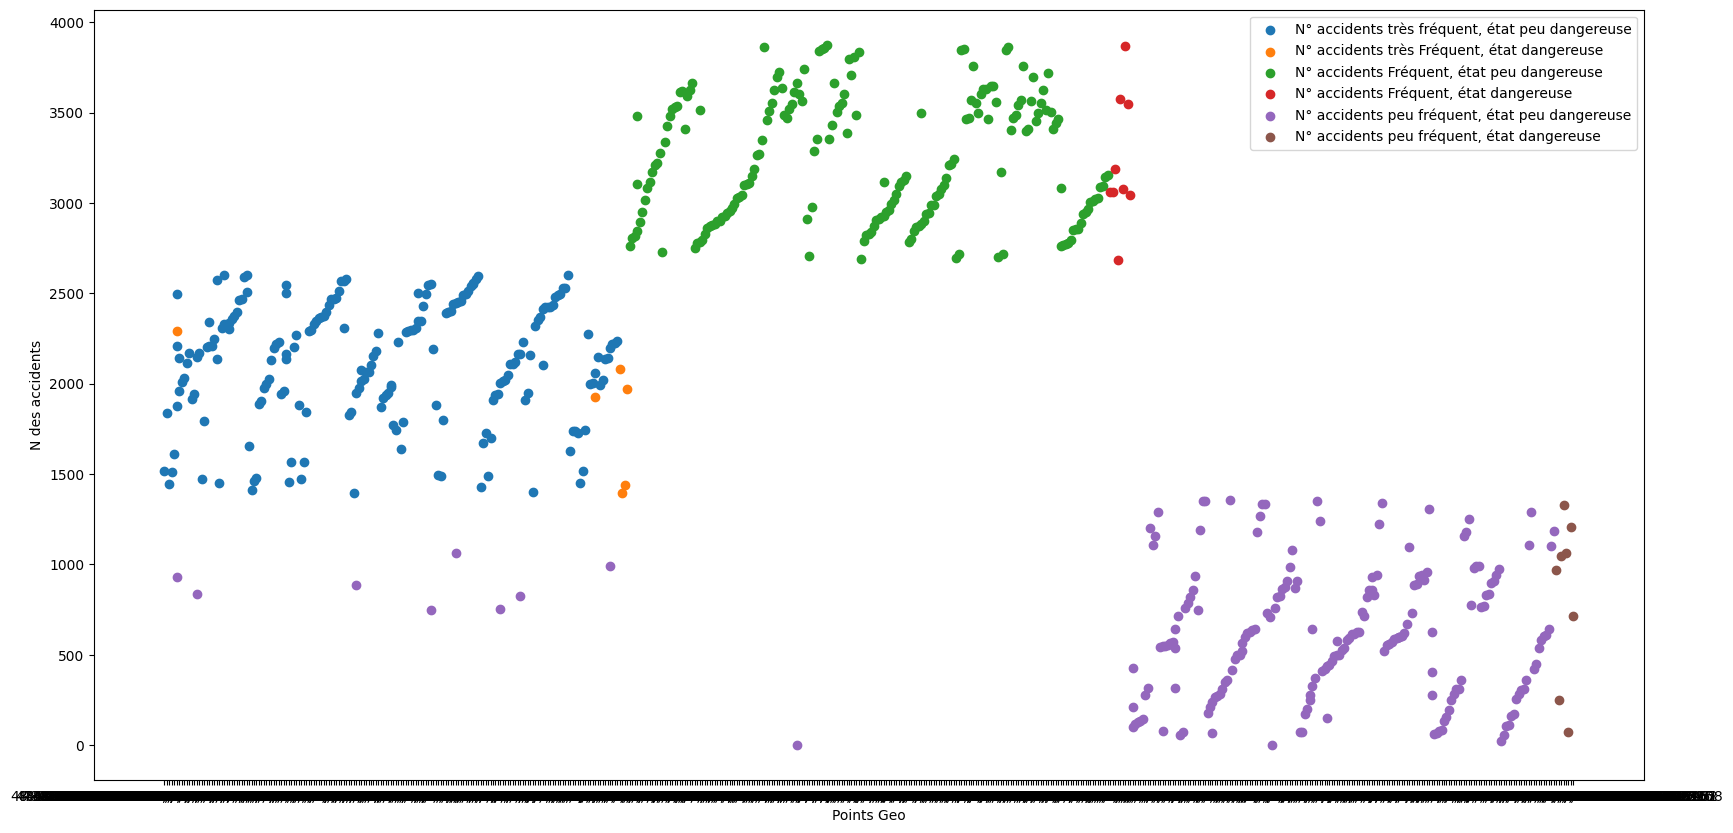

In [ ]:
plt.figure(figsize = (20,10))
plt.scatter(coord_clust00, acc_clust00, label = "N° accidents très fréquent, état peu dangereuse")
plt.scatter(coord_clust01, acc_clust01, label = "N° accidents très Fréquent, état dangereuse")
plt.scatter(coord_clust20, acc_clust20, label = "N° accidents Fréquent, état peu dangereuse")
plt.scatter(coord_clust21, acc_clust21, label = "N° accidents Fréquent, état dangereuse")
plt.scatter(coord_clust10, acc_clust10, label = "N° accidents peu fréquent, état peu dangereuse")
plt.scatter(coord_clust11, acc_clust11, label = "N° accidents peu fréquent, état dangereuse")

plt.xlabel("Points Geo")
plt.ylabel("N des accidents")
plt.legend()
plt.show()

In [38]:
k=0
coord_not_cyclable_with_frequent_acc = []
coord_not_cyclable_with_moy_frequent_acc = []
coord_not_cyclable_with_little_frequent_acc = []
for i in velo.iloc[:,0]:
    for j in coord_clust01:
        if i ==j:
            coord = j
            etat = velo.iloc[k,-1]
            k=k+1
            if etat == 'Not Yet':
                coord_not_cyclable_with_frequent_acc.append(j)


for i in velo.iloc[:,0]:
    for j in coord_clust21:
        if i ==j:
            coord = j
            etat = velo.iloc[k,-1]
            k=k+1
            if etat == 'Not Yet':
                coord_not_cyclable_with_moy_frequent_acc.append(j)

for i in velo.iloc[:,0]:
    for j in coord_clust11:
        if i ==j:
            coord = j
            etat = velo.iloc[k,-1]
            k=k+1
            if etat == 'Not Yet':
                coord_not_cyclable_with_little_frequent_acc.append(j)



print('les coordonnées qui présentent un nombre des accidents important, avec des pistes non cyclable', '\n',
      (coord_not_cyclable_with_frequent_acc), '\n', (coord_not_cyclable_with_moy_frequent_acc), '\n',
      (coord_not_cyclable_with_little_frequent_acc))


les coordonnées qui présentent un nombre des accidents important, avec des pistes non cyclable 
 ['48.10540072708687,-1.70844710368631', '48.11364865298198,-1.687234157446218'] 
 ['48.093909670300995,-1.67628750498542', '48.101718558615055,-1.630073802196482', '48.115520003849916,-1.77231999584913', '48.10444592509733,-1.677324523210986', '48.11606590734284,-1.666105996043191', '48.11426220672185,-1.63382425276087', '48.08654026588756,-1.666703807491815', '48.109858376660334,-1.679173925689499'] 
 ['48.09489760453466,-1.733114761639731', '48.089648021692156,-1.685406860214396', '48.11008827355182,-1.686200265539202']


In [67]:
# concatenate les rue ou il il y'a un besoin de piste cyclable

Coor = coord_not_cyclable_with_frequent_acc + coord_not_cyclable_with_moy_frequent_acc + coord_not_cyclable_with_little_frequent_acc 
Coor

# modifier la liste pour mettre en avant la longitute et latitude

converted_list = [tuple(item[0:].split(',')) for item in Coor]
converted_list

[('48.10540072708687', '-1.70844710368631'),
 ('48.11364865298198', '-1.687234157446218'),
 ('48.093909670300995', '-1.67628750498542'),
 ('48.101718558615055', '-1.630073802196482'),
 ('48.115520003849916', '-1.77231999584913'),
 ('48.10444592509733', '-1.677324523210986'),
 ('48.11606590734284', '-1.666105996043191'),
 ('48.11426220672185', '-1.63382425276087'),
 ('48.08654026588756', '-1.666703807491815'),
 ('48.109858376660334', '-1.679173925689499'),
 ('48.09489760453466', '-1.733114761639731'),
 ('48.089648021692156', '-1.685406860214396'),
 ('48.11008827355182', '-1.686200265539202')]

In [41]:
import folium
from ipyleaflet import Map, Marker
from folium.plugins import FastMarkerCluster

In [68]:
map2 = folium.Map(location = [48.117266, -1.6777926], zoom_start=11.5)
FastMarkerCluster(data=converted_list).add_to(map2)
map2

In [ ]:
velo

,Geo Point,c_cadmin,cadmin,c_cadmin_2,cadmin_2,c_cadmin_3,cadmin_3,c_cadmin_4,cadmin_4,c_cadmin_5,cadmin_5,c_cadmin_6,cadmin_6,heure,somme_victimes,somme_blesses,accident
2,"48.13312750451041,-1.670940278674956",7,VL,1,bicyclette,0,NaN,0,NaN,0,NaN,0,NaN,08:20,1,1,2205
8,"48.12685190930008,-1.687880463242971",1,bicyclette,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,08:20,1,1,2267
12,"48.09130621904447,-1.650894082218981",7,VL,1,bicyclette,0,NaN,0,NaN,0,NaN,0,NaN,16:35,1,1,1884
18,"48.11390527881266,-1.645807617203991",1,bicyclette,7,VL,0,NaN,0,NaN,0,NaN,0,NaN,14:10,1,1,2753
23,"48.11428594267462,-1.61038683590323",10,"VU seul ( 1,5 < PTAC =< 3,5t )",1,bicyclette,0,NaN,0,NaN,0,NaN,0,NaN,18:40,1,1,2781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3670,"48.105665117053704,-1.666044869473265",7,VL,1,bicyclette,0,NaN,0,NaN,0,NaN,0,NaN,20:15,1,1,2164
3676,"48.0876707617501,-1.651043196340976",1,bicyclette,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,09:04,1,1,3463
3682,"48.10156960550172,-1.649607255535325",1,bicyclette,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,13:58,1,1,3645
3684,"48.11541872415287,-1.713803249672971",7,VL,1,bicyclette,0,NaN,0,NaN,0,NaN,0,NaN,18:50,1,1,3649


In [69]:
velo['accidents_pred_2030'] = velo['accident']*2

In [71]:
new_data = velo[y_clusters ==1]
pred_accident = new_data ['accidents_pred_2030']
coord_accident = new_data['Geo Point']

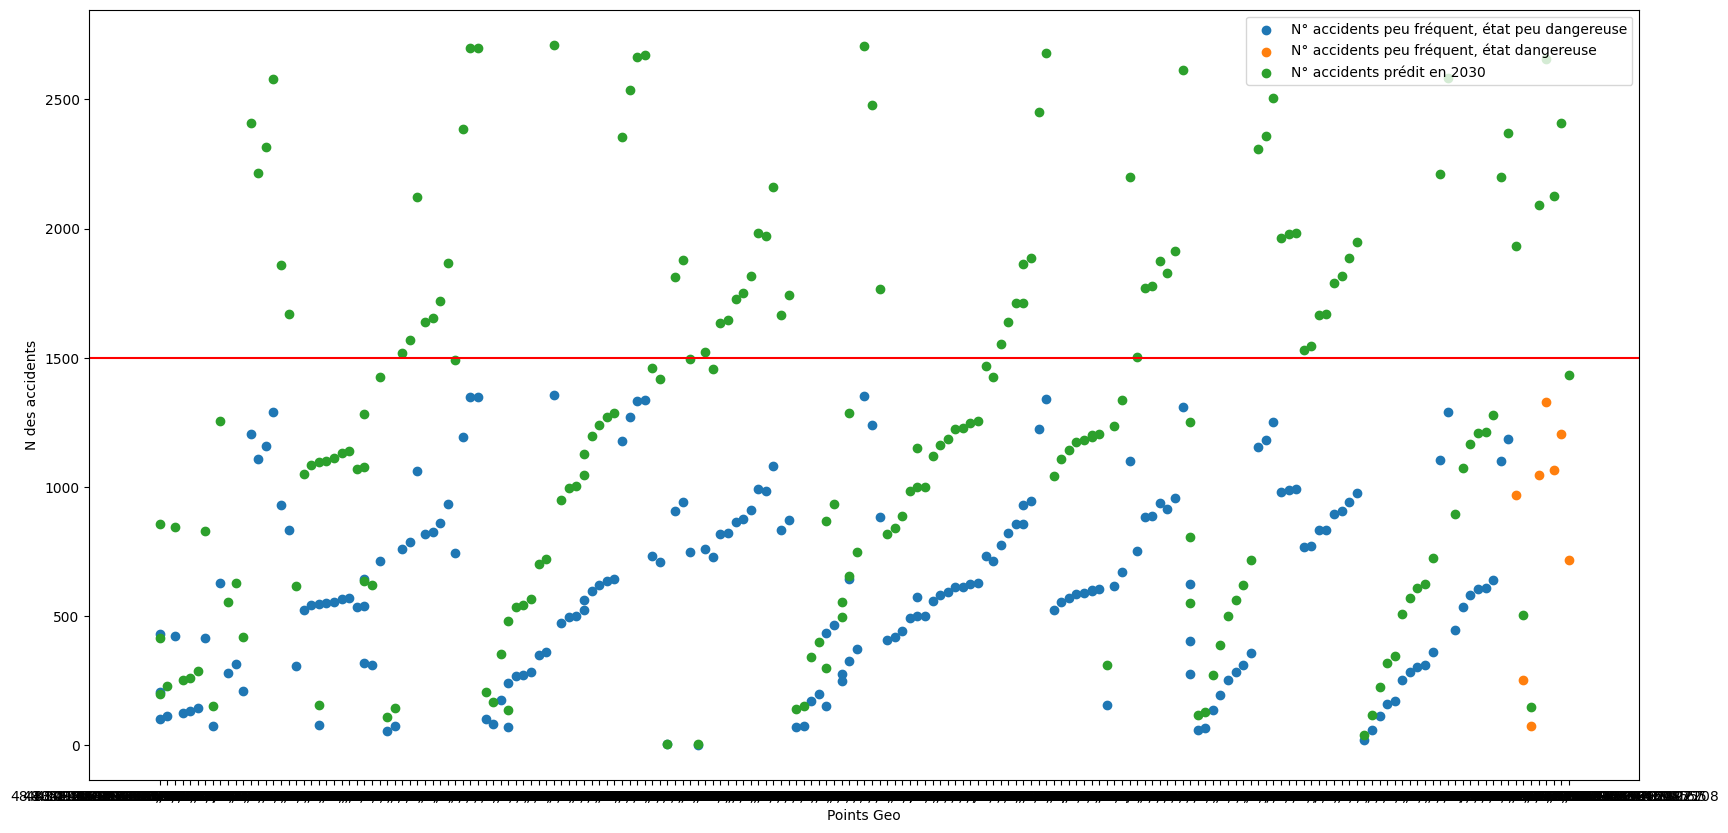

In [72]:
plt.figure(figsize = (20,10))
plt.scatter(coord_clust10, acc_clust10, label = "N° accidents peu fréquent, état peu dangereuse")
plt.scatter(coord_clust11, acc_clust11, label = "N° accidents peu fréquent, état dangereuse")
plt.scatter(coord_accident, pred_accident, label = "N° accidents prédit en 2030")
plt.axhline(y=1500, color = 'r', linestyle = '-')
plt.xlabel("Points Geo")
plt.ylabel("N des accidents")
plt.legend()
plt.show()

In [73]:
new_pred_acc = []
new_coord_acc = []
for i,j in zip(pred_accident,coord_accident):
    if i >1500:
        new_pred_acc.append(i)
        new_coord_acc.append(j)

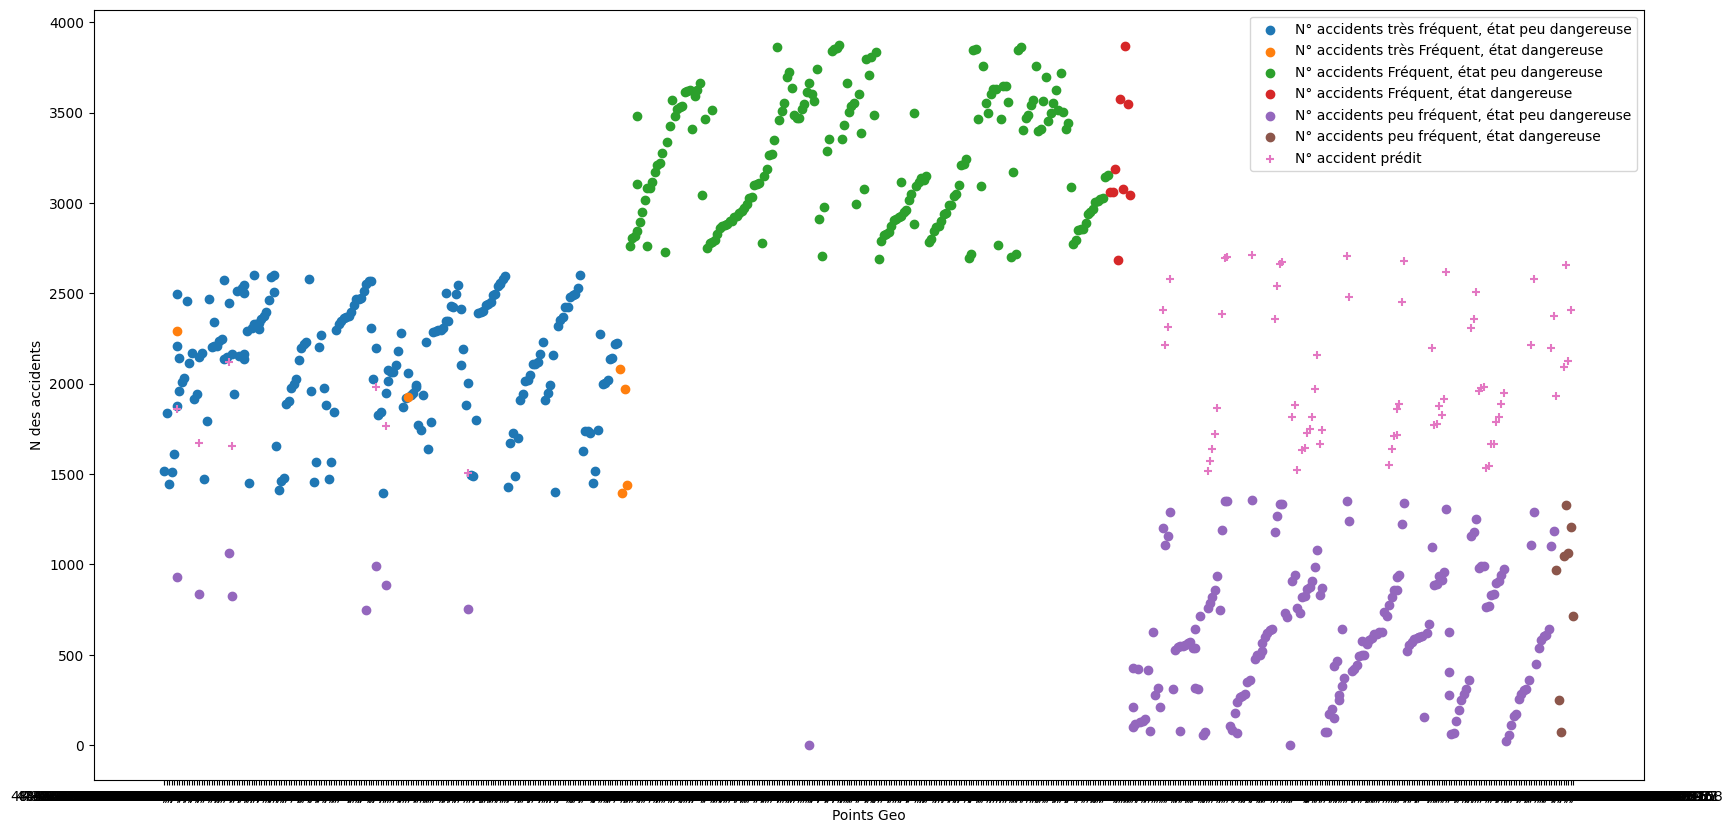

In [74]:
plt.figure(figsize = (20,10))
plt.scatter(coord_clust00, acc_clust00, label = "N° accidents très fréquent, état peu dangereuse")
plt.scatter(coord_clust01, acc_clust01, label = "N° accidents très Fréquent, état dangereuse")
plt.scatter(coord_clust20, acc_clust20, label = "N° accidents Fréquent, état peu dangereuse")
plt.scatter(coord_clust21, acc_clust21, label = "N° accidents Fréquent, état dangereuse")
plt.scatter(coord_clust10, acc_clust10, label = "N° accidents peu fréquent, état peu dangereuse")
plt.scatter(coord_clust11, acc_clust11, label = "N° accidents peu fréquent, état dangereuse")

plt.scatter(new_coord_acc, new_pred_acc, label ='N° accident prédit', marker = '+')
plt.xlabel("Points Geo")
plt.ylabel("N des accidents")
plt.legend()
plt.show()

In [76]:
new_coord = [tuple(item[0:].split(',')) for item in new_coord_acc]


map3 = folium.Map(location = [48.117266, -1.6777926], zoom_start=11.5)
FastMarkerCluster(data=new_coord).add_to(map3)
map3


